In [19]:
import os
import pandas as pd
import missingno as msno
from sklearn import preprocessing
from sklearn_pandas import CategoricalImputer
from sklearn.impute import SimpleImputer
#Import impute.SimpleImputer

os.chdir('/Users/suma/Documents/01 Data Science/Titanic Problem/')

In [9]:
df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')
frames = [df_train, df_test]
df = pd.concat(frames, axis = 0, sort=False)

In [24]:
def missing_value_summary(df):
    print(df.isnull().sum())
    msno.matrix(df, figsize = (14, 4), width_ratios=(15,1))    

Following columns have missing values
PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
Cabin          1014
Embarked          0
Survived        418
Ticket            0
Title             0
dtype: int64


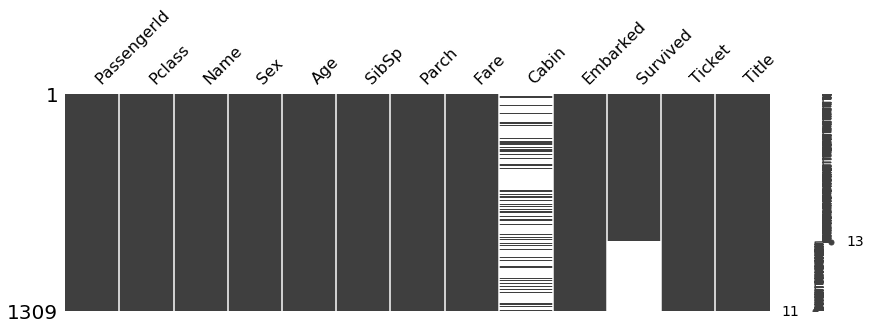

In [25]:
missing_value_summary(df)

In [12]:
def extract_title(name):
     return name.split(',')[1].split('.')[0].strip()
df['Title'] = df['Name'].map(extract_title)

#### Imputing missing values of Age column: Group By Title; Mean on Age

In [13]:
df.groupby("Title").mean()['Age']
df["Age"] = df.groupby("Title").transform(lambda x: x.fillna(x.mean()))['Age']

#### Imputing missing values of Embarked: mode - most frequent value of Embarked column

In [14]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

#### Imputing missing values of Fare: mean imputation

In [20]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

Following columns have missing values
Cabin: 1014
Survived: 418


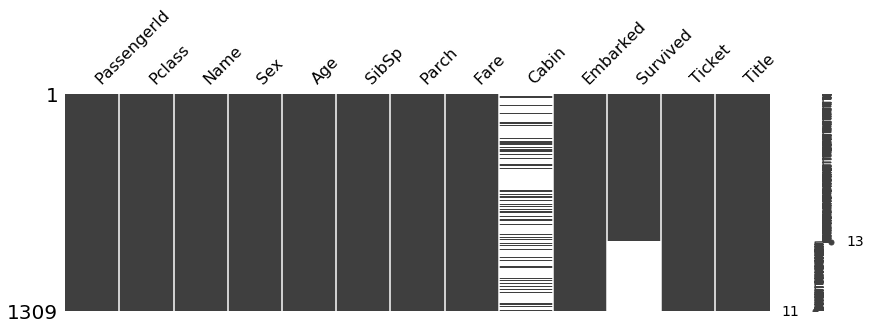

In [21]:
missing_value_summary(df)